<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Model_Concepts/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent
The next important concept needed to understand linear regression is gradient descent. 
When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data. thus, it is usefiul for large datasets.

Gradient descent is a method of updating b_0 and b_1 to reduce the cost function(MSE). The idea is that we start with some values for b_0 and b_1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

To draw an analogy, imagine a pit in the shape of U and you are standing at the topmost point in the pit and your objective is to reach the bottom of the pit. There is a catch, you can only take a discrete number of steps to reach the bottom. If you decide to take one step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom. In the gradient descent algorithm, the number of steps you take is the learning rate. This decides on how fast the algorithm converges to the minima.

You may be wondering how to use gradient descent to update b_0 and b_1. To update b_0 and b_1., we take gradients from the cost function. To find these gradients, we take partial derivatives with respect to b_0 and b_1.

The partial derivates are the gradients and they are used to update the values of b_0 and b_1. Alpha is the learning rate which is a hyperparameter that you must specify. A smaller learning rate could get you closer to the minima but takes more time to reach the minima, a larger learning rate converges sooner but there is a chance that you could overshoot the minima.

**So let’s jot down the clear steps we performed:**
1. Initiate the values of the weights b_0 and b_1. — which can be any value and the step size α(aplha) — which needs to be a good value.
2. Find the predictions of target Ŷ = b_0+ b_1.X for all X.
3. Calculate the error values (Ŷ-Y) and the MSE.
4. Update the weights as per the Gradient Descent update rule.
5. Repeat 2–4.

**TYPES:**
1. Stochastic Gradient Descent, where the updates in the weights are done in every iteration
2. Mini Batch Gradient Descent, which is a midway between Batch and Stochastic, divides the complete data set into mini batches and then applies weight updates after each batch.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=np.array([1,3,5])
y=np.array([5,12,18])

In [ ]:
#initializations
b_0=0
b_1=0
alpha=0.01
MSE=np.array([])

In [ ]:
# 10 iterations
for iteration in range(1,11):
    y_pred=np.array([])
    error=np.array([]) #ie,(yhat-y) 
    error_x=np.array([]) #ie,X(yhat-y) 
    b_0=b_0
    b_1=b_1
    for i in x:
        y_pred=np.append(y_pred,(b_0+b_1*i))
    error=np.append(error,y_pred-y)
    error_x=np.append(error_x,error*x)
    MSE_val=(error**2).mean()
    MSE=np.append(MSE,MSE_val)
    b_0=b_0-alpha*np.sum(error)
    b_1=b_1-alpha*np.sum(error_x)
    

In [ ]:
print(b_0,b_1)

0.973416165683335 3.4621748400108516


In [ ]:
print('MSE', MSE)

MSE [164.33333333  64.65466667  25.53827456  10.18699734   4.1613521
   1.79517672   0.86502622   0.49840378   0.35293479   0.29426863]


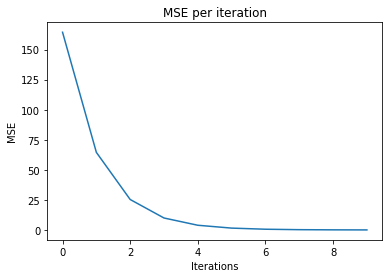

In [ ]:
plt.plot(MSE)
plt.title('MSE per iteration')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

In [ ]:
# ANOTHER 

In [ ]:
train=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\LR train.csv")
test=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\LR test.csv")
print(train.shape,test.shape)

(700, 2) (300, 2)


In [ ]:
train.isna().sum()

x    0
y    0
dtype: int64

In [ ]:
train.fillna(value=train.x.mean(),inplace=True)

In [ ]:
train.isna().sum()

x    0
y    0
dtype: int64

In [ ]:
print(train.shape,test.shape)

(700, 2) (300, 2)


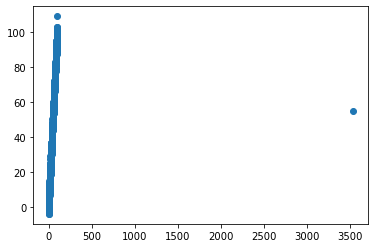

In [ ]:
plt.scatter(train.x,train.y)

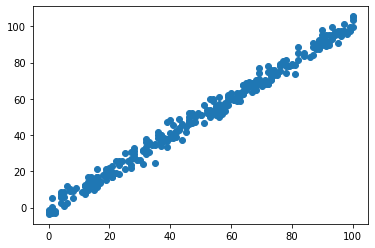

In [ ]:
plt.scatter(test.x,test.y)

In [ ]:
x_train = train['x']
y_train = train['y']
x_test = test['x']
y_test = test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

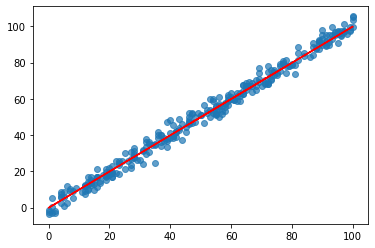

In [ ]:
plt.scatter(x_test,y_test,alpha=0.7)
plt.plot(x_test,clf.predict(x_test),color="red")

In [ ]:
y_pred = clf.predict(x_test)
print(r2_score(y_test,y_pred))

0.9888014444327563


In [ ]:
n = 699 # x_train shape
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

epochs = 0
while(epochs < 1000):
    y = a_0 + a_1 * x_train
    error = y - y_train
    mean_sq_er = np.sum(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n 
    a_1 = a_1 - alpha * 2 * np.sum(error * x_train)/n
    epochs += 1
    if(epochs%10 == 0):
        print(mean_sq_er)

1.3942356296511217e+54
3.2291316301445906e+107
7.478858568124144e+160
1.7321475829555947e+214
4.011755566453295e+267


C:\Users\sanjana grover\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\sanjana grover\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()


inf
inf
inf
inf
inf
inf


C:\Users\sanjana grover\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
import matplotlib.pyplot as plt 

y_prediction = a_0 + a_1 * x_test
print('R2 Score:',r2_score(y_test,y_prediction))

y_plot = []
for i in range(100):
    y_plot.append(a_0 + a_1 * i)
plt.figure(figsize=(10,10))
plt.scatter(x_test,y_test,color='red',label='GT')
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (699,1) (300,1) 

In [ ]:
data=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\1.02. Multiple linear regression.csv")
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [ ]:
x1=data[["SAT"]]
y=data["GPA"]

In [ ]:
x=sm.add_constant(x1)
x.head()

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693


In [ ]:
results=sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Thu, 28 May 2020   Prob (F-statistic):                   9.38e-102
Time:                        22:37:20   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

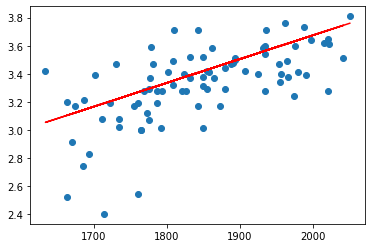

In [ ]:
plt.scatter(x1,y) # positive relation
yhat= 0.275+0.0017*x1
plt.plot(x1,yhat,color="red")

In [ ]:
lr=LinearRegression()
lr.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

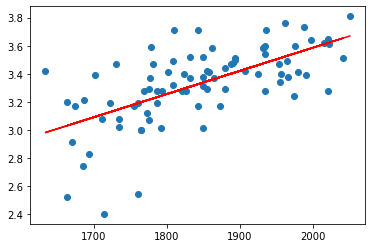

In [ ]:
plt.scatter(x1,y) # positive relation
plt.plot(x1,lr.predict(x1),color="red")

In [ ]:
lr.score(x1,y) # how well fitti8ng the training data

0.40600391479679765

In [ ]:
x1.shape

(84, 1)